## Importing the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

## Data Exploration and Preprocessing

In [14]:
## Load dozzy dataset
df = pd.read_csv('../dozzy_data.csv')

In [5]:
## Check the columns and rows of the data - the shape of the data
df.shape

(300, 12)

In [6]:
## Checking the first 5 data 
df.head(5)

,q1,q2,q3,q4,q5,q6,q7,chronotype,timestamp,id,score_variance,confidence
0,0,2,1,1,0,0,0,Night Owl,2025-03-14 02:08:53,1,0.619048,60.0
1,2,1,1,0,2,3,0,Night Owl,2025-03-14 02:08:53,2,1.238095,60.0
2,1,1,0,0,1,0,0,Night Owl,2025-03-14 02:08:53,3,0.285714,60.0
3,2,0,0,1,0,2,0,Night Owl,2025-03-14 02:08:53,4,0.904762,60.0
4,5,5,4,2,5,4,4,Morning Lark,2025-03-14 02:08:53,5,1.142857,60.0


In [7]:
## Checking the datatypes making sure that every data is clear
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   q1              300 non-null    int64  
 1   q2              300 non-null    int64  
 2   q3              300 non-null    int64  
 3   q4              300 non-null    int64  
 4   q5              300 non-null    int64  
 5   q6              300 non-null    int64  
 6   q7              300 non-null    int64  
 7   chronotype      300 non-null    object 
 8   timestamp       300 non-null    object 
 9   id              300 non-null    int64  
 10  score_variance  300 non-null    float64
 11  confidence      300 non-null    float64
dtypes: float64(2), int64(8), object(2)
memory usage: 28.2+ KB


In [23]:
## Identify the data.. - categorical(target values - y) and numerical data(X)
## Dependent and Independent variable

X = df.iloc[:, :7]
y = df.iloc[:, -2]

y.head()

0    1
1    1
2    1
3    1
4    0
Name: chronotype, dtype: int64

In [9]:
## Checking the missing values
df.isnull().sum()

q1                0
q2                0
q3                0
q4                0
q5                0
q6                0
q7                0
chronotype        0
timestamp         0
id                0
score_variance    0
confidence        0
dtype: int64

In [27]:
df.corr()

,q1,q2,q3,q4,q5,q6,q7,chronotype,confidence
q1,1.000000,0.793944,0.799620,0.698160,0.812079,0.749185,0.780435,-0.885238,0.080960
q2,0.793944,1.000000,0.790090,0.721386,0.811504,0.749620,0.769643,-0.889222,0.047023
q3,0.799620,0.790090,1.000000,0.719074,0.806085,0.763822,0.776655,-0.894908,0.059792
q4,0.698160,0.721386,0.719074,1.000000,0.718680,0.655455,0.701915,-0.798636,0.015555
q5,0.812079,0.811504,0.806085,0.718680,1.000000,0.783337,0.816937,-0.910045,0.066226
q6,0.749185,0.749620,0.763822,0.655455,0.783337,1.000000,0.747692,-0.853470,-0.007093
q7,0.780435,0.769643,0.776655,0.701915,0.816937,0.747692,1.000000,-0.873248,0.113332
chronotype,-0.885238,-0.889222,-0.894908,-0.798636,-0.910045,-0.853470,-0.873248,1.000000,-0.079682
confidence,0.080960,0.047023,0.059792,0.015555,0.066226,-0.007093,0.113332,-0.079682,1.000000


Text(0, 0.5, 'chronotype')

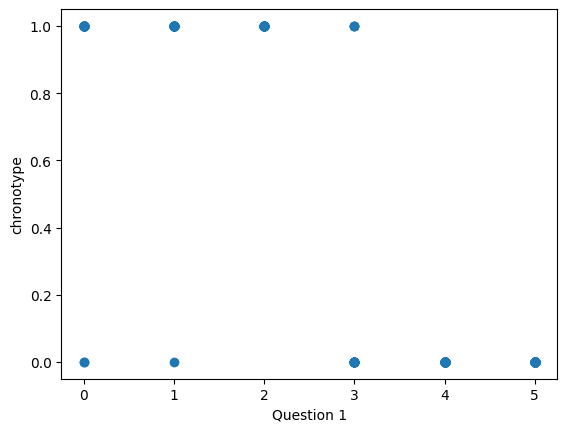

In [28]:
plt.scatter(df["q1"], df["chronotype"])
plt.xlabel("Question 1")
plt.ylabel("chronotype")

## Feature Engineering

In [15]:
## Normaize the chronotype column(Morning Lark/Night Owl)) and convert it into numerical format

df['chronotype'] = df['chronotype'].map({'Morning Lark': 0, 'Night Owl': 1})
print(df)

     q1  q2  q3  q4  q5  q6  q7  chronotype            timestamp   id  \
0     0   2   1   1   0   0   0           1  2025-03-14 02:08:53    1   
1     2   1   1   0   2   3   0           1  2025-03-14 02:08:53    2   
2     1   1   0   0   1   0   0           1  2025-03-14 02:08:53    3   
3     2   0   0   1   0   2   0           1  2025-03-14 02:08:53    4   
4     5   5   4   2   5   4   4           0  2025-03-14 02:08:53    5   
..   ..  ..  ..  ..  ..  ..  ..         ...                  ...  ...   
295   5   3   5   4   4   4   3           0  2025-03-14 02:08:53  296   
296   5   4   5   3   4   4   3           0  2025-03-14 02:08:53  297   
297   0   1   2   0   1   2   2           1  2025-03-14 02:08:53  298   
298   0   1   0   3   1   0   1           1  2025-03-14 02:08:53  299   
299   4   5   5   5   3   5   3           0  2025-03-14 02:08:53  300   

     score_variance  confidence  
0          0.619048        60.0  
1          1.238095        60.0  
2          0.285714  

In [16]:
## dropping the unneccessary fields in the dataset. - Timestamp, Id, Score_variance, ...
df.drop(columns=['timestamp', 'id', 'score_variance'], inplace=True)

In [72]:
## Split the data into train, validation, and test
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

In [73]:
## Scaling the data to have a good convergence
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [74]:
X_train = scaler.fit_transform(X_train)

In [75]:
X_test = scaler.transform(X_test)

In [76]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [77]:
X_train

array([[ 0.57712548, -0.37920974,  1.17948603, ...,  0.6972367 ,
         1.19980123,  1.21488066],
       [ 1.13865297,  1.22058136,  1.17948603, ...,  1.26770309,
         0.64604682,  0.68021436],
       [-1.66898449, -0.37920974, -1.49441177, ..., -1.01416247,
        -0.46146201, -1.45845087],
       ...,
       [ 1.13865297,  0.68731766,  1.17948603, ...,  0.12677031,
         0.64604682,  0.68021436],
       [ 0.57712548,  0.15405396,  1.17948603, ...,  0.12677031,
         0.0922924 ,  0.14554805],
       [-1.66898449, -1.44573714, -1.49441177, ..., -1.01416247,
        -1.01521643, -1.45845087]])

## Model Training

In [78]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()

In [79]:
regressor.fit(X_train, y_train)

LogisticRegression()

In [80]:
## Check the coeficients..
print(regressor.coef_)

[[-0.93302211 -0.92693755 -1.04710843 -0.74837585 -0.96352977 -0.78299356
  -0.83714395]]


In [81]:
## Prediction with test data... lets say (X_test)
predictions = regressor.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])

## Plot analysis

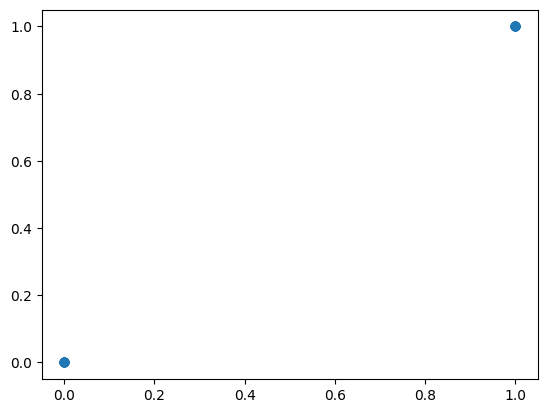

In [82]:
## Compare predictions along with the original values
plt.scatter(y_test, predictions)

In [83]:
## Error - The difference between true value and predicted value
error = y_test - predictions
error

77     0
229    0
233    0
278    0
281    0
173    0
193    0
237    0
93     0
18     0
148    0
6      0
57     0
7      0
10     0
101    0
96     0
203    0
15     0
265    0
30     0
63     0
164    0
108    0
286    0
218    0
221    0
245    0
82     0
147    0
104    0
66     0
249    0
179    0
97     0
132    0
17     0
75     0
197    0
175    0
24     0
42     0
186    0
157    0
274    0
114    0
226    0
194    0
56     0
73     0
231    0
119    0
289    0
22     0
215    0
248    0
109    0
60     0
230    0
256    0
Name: chronotype, dtype: int64

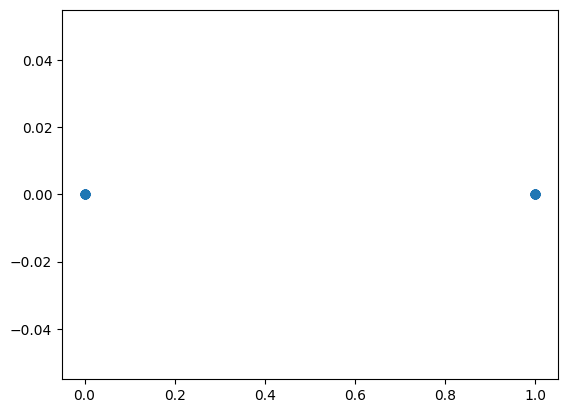

In [84]:
plt.scatter(y_test, error)

## Performance Metrics

In [85]:
## Implementing the mean squared error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

logloss = log_loss(y_test, predictions)
print(logloss)

2.220446049250313e-16


In [86]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predictions)
print(score)

1.0


In [87]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

1.0

In [96]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [89]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV score: 1.0


In [90]:
## Confusion matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[28  0]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        32

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [93]:
validation_pred = regressor.predict(X_val)
validation_pred

c:\Users\KIIT\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [97]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## Prepare for the new data

In [ ]:
# Example new data point (replace with actual data)
new_data_point = np.array(
    [[feature1, feature2, ..., featureN]])  # Reshape as needed

# Transform the new data point using the scaler
transformed_data = scaler.transform(new_data_point)

# Make a prediction
prediction = pickled_model.predict(transformed_data)
print(f"Prediction: {prediction}")

## Model for development

In [99]:
pickle.dump(regressor, open('dozzy_model.pkl', 'wb'))

In [100]:
pickled_model = pickle.load(open('dozzy_model.pkl', 'rb'))